# **MINIST Digit Classification Using Deep Learning**

Importing the Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


**Loading he MINIST data from keras.datasets**

In [4]:
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
type(X_train)

numpy.ndarray

In [6]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [7]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


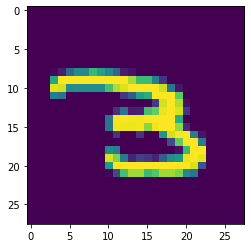

3


In [9]:
#displaying the image

plt.imshow(X_train[250])
plt.show()

#print the corresponding label
print(Y_train[250])

Image Labels


In [10]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [11]:
#unique value in Y_train
print(np.unique(Y_train))

#unique value in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [12]:
#scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
#printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# **Building Neural Network**

In [18]:
# Setting up the layer of Neural Network


model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [19]:
# compling the Neural Network

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1375 - accuracy: 0.9601
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1032 - accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0712 - accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0454 - accuracy: 0.9855
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9873
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

Training data accuracy --> 98.9%

#**Accuracy on Test Data**

In [22]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9749
0.9749000072479248


Test data accuracy --> 97.4%

In [23]:
print(X_test.shape)

(10000, 28, 28)


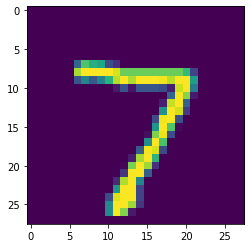

In [24]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [25]:
print(Y_test[0])

7


In [27]:
Y_pred = model.predict(X_test)

In [28]:
print(Y_pred.shape)

(10000, 10)


In [29]:
print(Y_pred[0])

[2.80171633e-03 7.55941153e-01 4.10793573e-01 5.16694188e-01
 1.42315475e-05 3.31699848e-04 2.71676615e-09 9.99999046e-01
 2.52720714e-03 4.42832917e-01]


**model.predict() gives the accuracy of each class for data point**

In [31]:
# converting the prediction probablities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [32]:
# converting the prediction probabilities to class label for all test data points

Y_pred_label= [np.argmax(i) for i in Y_pred]
print(Y_pred_label) 

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Y_test  -->  True labels**

**Y_pred_label  -->  Predicted Labels**

##Confusin Matrix

In [33]:
con_mat = confusion_matrix(Y_test, Y_pred_label)

In [34]:
print(con_mat)

tf.Tensor(
[[ 967    1    0    1    1    2    1    1    5    1]
 [   0 1123    3    0    0    2    2    0    5    0]
 [   4    2 1008    1    5    1    2    5    4    0]
 [   0    0    4  971    0   21    0    4    4    6]
 [   2    1    2    0  964    0    6    0    1    6]
 [   2    0    0    4    2  874    3    1    4    2]
 [   3    3    0    1    4    4  941    0    2    0]
 [   1    8   10    1    0    0    0  998    3    7]
 [   3    2    4    2    6    7    1    4  944    1]
 [   3    4    0    6   14    7    2    6    8  959]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

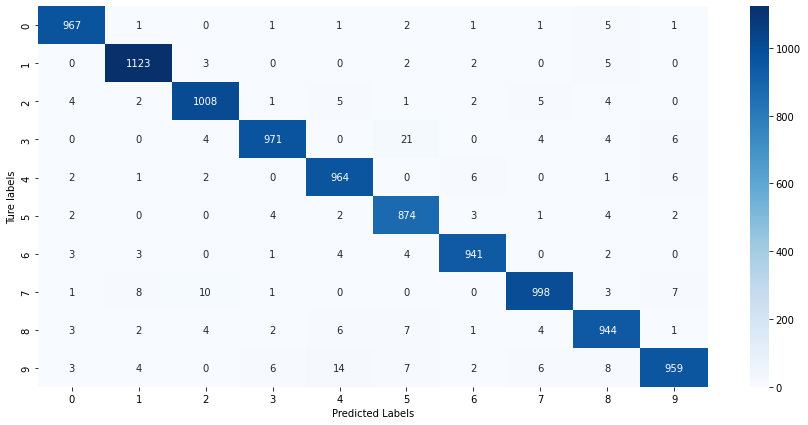

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Ture labels')
plt.xlabel('Predicted Labels')

# **Building a Predictive System**

Prediction image link: https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67

In [38]:
input_image_path = '/content/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67.png'


input_image = cv2.imread(input_image_path)

In [40]:
type(input_image)

numpy.ndarray

In [41]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


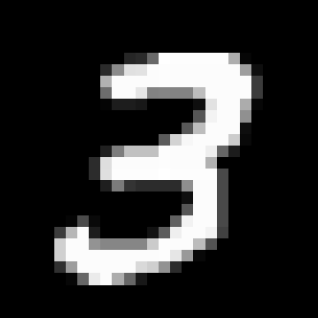

In [43]:
cv2_imshow(input_image)

In [44]:
input_image.shape

(318, 318, 3)

In [46]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [47]:
grayscale.shape

(318, 318)

In [48]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [49]:
input_image_resize.shape

(28, 28)

In [50]:
cv2_imshow(input_image_resize)

In [51]:
input_image_resize = input_image_resize/255

In [54]:
image_reshape = np.reshape(input_image_resize, [1,28,28])

In [55]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

[[1.48850321e-09 2.89464116e-01 2.13825703e-03 1.00000000e+00
  4.20947988e-09 3.15786213e-01 1.28577585e-14 2.48575211e-03
  9.79368210e-01 3.48269731e-01]]


In [59]:
input_pred_label = np.argmax(input_prediction)

In [60]:
print(input_pred_label)

3


#**Making a Predictive System**



Path of the to be predicted: /content/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67.png


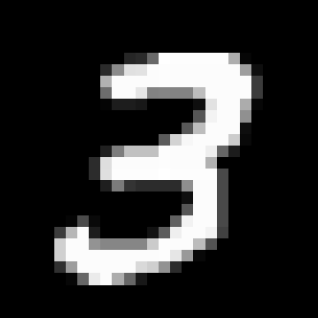

The HandWritten Digit is recognised as: 3


In [65]:
input_image_path = input('Path of the to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

print('The HandWritten Digit is recognised as:', input_pred_label)